<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/machine/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Machine learning
##<center>Perceptron
##<center>
###<center>Catedrático: Dr. Luis Carlos González Gurrola 
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>



<center>
Ninguna pérdida debe sernos más sensible que la del tiempo, puesto que es irreparable.


$Zenón \ de\ Citio$

<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class perceptron():

  """
  Perceptron

  por:Ing.Luis Ángel Almazán López

  parametros: 
  X: array
    vector de datos de entrada

  T: array
    Vector target

  w:array
     Vector de pesos, por default aleatorio 
     valores entre 0 a 1 

  n_iter: int
    numero de iteraciones, por deafult 50

  bias: int 
     por default aleatorio
     valores entre 0 a 1 
  """


  def __init__(self,X,T, W=np.zeros(0),n_ite:int=50,etha:float=0.25,bias=None):
    if bias==None:
      bias=np.random.rand()
    self.bias=bias
    self._X=X


    self.T=T
    self.W=W
    self.iter=n_ite
    self.etha=etha

    #Generando números aleatorios en caso de no ingresar un valor
    if len(self.W)==0:
      self.W=np.random.rand(len(self._X[0]))


  def calc_error(self,x,t):
    return t-self.predict(x)


  def fit(self):
    for _ in range(self.iter):
      for i,x in enumerate(self._X):

        error=self.calc_error(x,self.T[i])
        if error!=0:
          self.W=self.W +self.etha*error*x
          self.bias=self.bias+self.etha*error

  #Con función umbral
  def predict(self,x):
    return np.where( self.bias+np.dot(x,self.W)>= 0.0, 1, 0)



#Compuerta OR
Tabla de verdad de la función OR:

| x1 |  x2  |  y  |
|:---|:---:|:---:|
| 0 |   0 |  0 |
| 0 |  1 |  1 |
|1 | 0  |  1 |
| 1 |  1  | 1  |

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
T=np.array([0,1,1,1])
w=np.array([-0.02,0.02])
b=0.05
comp_or = perceptron(X,T,W=w)
comp_or.fit()
print(f'Vector de pesos "w": {comp_or.W}')
print(f"bias: {comp_or.bias}")
print(f"Predicción 0,0 : {comp_or.predict([0,0])}")
print(f"Predicción 1,0 : {comp_or.predict([1,0])}")
print(f"Predicción 0,1 : {comp_or.predict([0,1])}")
print(f"Predicción 1,1 : {comp_or.predict([1,1])}")



Vector de pesos "w": [0.23 0.27]
bias: -0.06589163732663716
Predicción 0,0 : 0
Predicción 1,0 : 1
Predicción 0,1 : 1
Predicción 1,1 : 1


##Gráfica

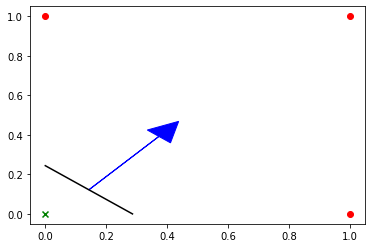

In [ ]:

#Grafica
ax = plt.axes()
for i,t in enumerate(comp_or.T):
  x=comp_or._X[i][0]
  y=comp_or._X[i][1]


  if t==1:
    plt.scatter(x,y,color ="red", marker="o")
  else:
    plt.scatter(x,y,color ="green", marker="x")

#punto de interseción con el eje de y
x1=0

y1=-comp_or.bias/comp_or.W[1]


#punto de intersecion con x
x2=-comp_or.bias/comp_or.W[0]

y2=0

#Punto intermedio de la recta
x3=(x2+x1)/2
y3=(y1+y2)/2  

val=(x2-x1)*(comp_or.W[0])+(y2-y1)*(comp_or.W[1])

#print(f"val{val}")

#Frontera entre clases
plt.plot([x2,x1],[y2,y1], color ="black")

#Vector 
#plt.plot([x3,x3+comp_or.W[1]],[y3,y3+comp_or.W[0]], color ="Blue")

ax.arrow(x3,y3,comp_or.W[0],comp_or.W[1], head_width=0.1, head_length=0.1,color="blue", label="Vector W")

plt.show()


#Compuerta XOR 

Tabla de verdad de la función XOR:

| x1 |  x2  |  y  |
|:---|:---:|:---:|
| 0 |   0 |  0 |
| 0 |  1 |  1 |
|1 | 0  |  1 |
| 1 |  1  | 0  |

In [ ]:
X=[[0,0],[0,1],[1,0],[1,1]]
Y=[0,1,1,0]

X=np.array([[0,0],[0,1],[1,0],[1,1]])
T=np.array([0,1,1,0])
comp_xor = perceptron(X,T)
comp_xor.fit()
print(f'Vector de pesos "w": {comp_xor.W}')
print(f"bias: {comp_or.bias}")
print(f"Predicción 0,0 : {comp_xor.predict([0,0])}")
print(f"Predicción 1,0 : {comp_xor.predict([1,0])}")
print(f"Predicción 0,1 : {comp_xor.predict([0,1])}")
print(f"Predicción 1,1 : {comp_xor.predict([1,1])}")

Vector de pesos "w": [-0.24648953 -0.11805736]
bias: -0.06589163732663716
Predicción 0,0 : 1
Predicción 1,0 : 0
Predicción 0,1 : 1
Predicción 1,1 : 0


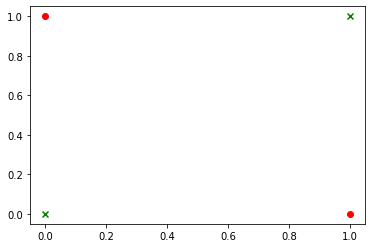

In [ ]:
X=[[0,0],[0,1],[1,0],[1,1]]
Y=[0,1,1,0]

for x,y in zip(X,Y):
  if y==1:

    plt.scatter(x[0],x[1],color ="red", marker="o")
  else:
    plt.scatter(x[0],x[1],color ="green", marker="x")

plt.show()

##Linealmente separables
Como se puede observar en este caso, con este enfoque, el problema sera linealmente no separable,por lo tanto un solo perceptron no podra separar las diferentes muestras.
Se tratara agregar otra dimención al problema para ver si en el espacio se vuelve linealmentes separables

In [ ]:
X=[[0,0,0],[0,1,1],[1,0,0],[1,1,0]]
Y=[0,1,1,0]

X=np.array([[0,0,0],[0,1,1],[1,0,0],[1,1,0]])
T=np.array([0,1,1,0])
comp_xor = perceptron(X,T)
comp_xor.fit()
print(f'Vector de pesos "w": {comp_xor.W}')
print(f"bias: {comp_or.bias}")
print(f"Predicción 0,0 : {comp_xor.predict([0,0,0])}")
print(f"Predicción 1,0 : {comp_xor.predict([1,0,0])}")
print(f"Predicción 0,1 : {comp_xor.predict([0,1,1])}")
print(f"Predicción 1,1 : {comp_xor.predict([1,1,0])}")



Vector de pesos "w": [ 0.16369463 -0.16076355  0.76985037]
bias: -0.06589163732663716
Predicción 0,0 : 0
Predicción 1,0 : 1
Predicción 0,1 : 1
Predicción 1,1 : 0


##Gráficas

0 [0 0 0]
1 [0 1 1]
2 [1 0 0]
3 [1 1 0]


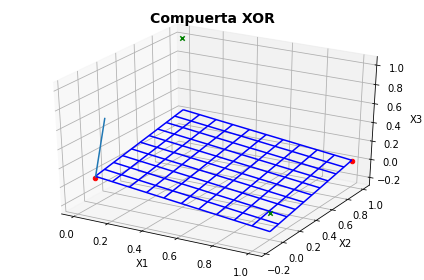

In [ ]:
##Graficas
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


X,Y,Z = np.zeros(len(comp_xor._X),dtype=int),np.zeros(len(comp_xor._X),dtype=int),np.zeros(len(comp_xor._X),dtype=int)

for i,x in enumerate(comp_xor._X):
  X[i]=x[0]
  Y[i]=x[1]
  Z[i]=x[2]


#fig=plt.figure(figsize=(8,6))
fig=plt.figure()
axes = plt.axes(projection="3d")

for i in range(len(X)):
  if comp_xor.T[i]==0:

    axes.scatter3D(X[i],Y[i],Z[i],color="red",marker="o")
  else:
    axes.scatter3D(X[i],Y[i],Z[i],color="green",marker="x")



#axes.scatter3D(X,Y,Z,color="red")
axes.set_title("Compuerta XOR",fontsize=14,fontweight="bold")
axes.set_xlabel("X1")
axes.set_ylabel("X2")
axes.set_zlabel("X3")
wx=np.array([[0,comp_xor.W[0]]])
wy=np.array([[0,comp_xor.W[1]]])
wz=np.array([[0,comp_xor.W[2]]])
axes.plot_wireframe(wx,wy,wz)
plt.tight_layout()



#plano que separa el espacio
#limites en x:
ax,bx=0,1

#limites en y:
ay,by=0,1

muestras =11

xi = np.linspace(ax,bx, muestras)
yi = np.linspace(ay,by, muestras)

Xi, Yi = np.meshgrid(xi,yi)

z0 = lambda x,y:-1* (comp_xor.W[0]*x + comp_xor.W[1]*y + comp_xor.bias)/comp_xor.W[2]


Z0 = z0(Xi,Yi)


axes.plot_wireframe(Xi,Yi,Z0,color ='blue',label='Ecuación 1')
plt.show()
